In [1]:
# magic command
%matplotlib inline

In [2]:
# imports 
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# files used
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

In [4]:
# reading csv files and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [5]:
# checking for missing values in city_data_df
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# checking data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# checking unique data
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# counting # of Urban cities
sum(city_data_df["type"]=="Urban")
#sum(city_data_df["type"]=="Rural")

66

In [9]:
# checking for missing values in ride_data_df
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
# checking data types for ride
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
# mergin two DFs
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# show merged df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# DF for urban cities
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# DF for suburban cities
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [14]:
# DF fro Rural cities
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
# num. of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# num. of rides for Suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
# num. of rides for Rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [19]:
# avg. fare for Urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
# avg. fare for Suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
# avg. fare for Rural cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [20]:
# avg. # of drivers urban
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
# avg. # of drivers suburban
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
# avg. # of drivers rural
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


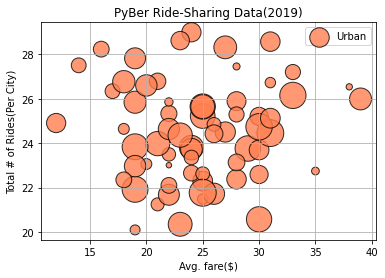

In [27]:
# urban cities Bubble chart
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            c="coral", edgecolor="k", alpha=0.8,
            label="Urban",
            linewidths=1
           )
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Avg. fare($)")
plt.ylabel("Total # of Rides(Per City)")
plt.grid(True)
plt.legend()

plt.show()

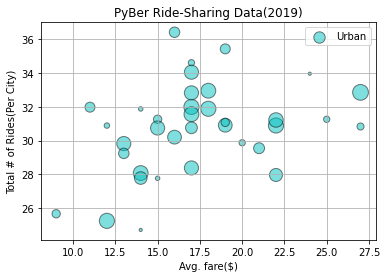

In [31]:
# suburban cities Bubble chart
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c="c", edgecolor="k", alpha=0.5,
            label="Suburban",
            linewidths=1
           )
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Avg. fare($)")
plt.ylabel("Total # of Rides(Per City)")
plt.grid(True)
plt.legend()

plt.show()

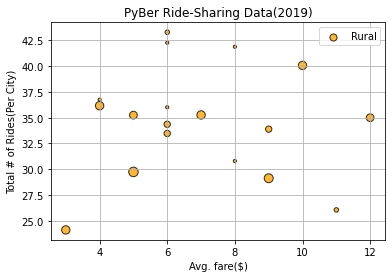

In [33]:
# rural cities Bubble chart
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count,
            c="orange", edgecolor="k", alpha=0.8,
            label="Rural",
            linewidths=1
           )
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Avg. fare($)")
plt.ylabel("Total # of Rides(Per City)")
plt.grid(True)
plt.legend()

plt.show()

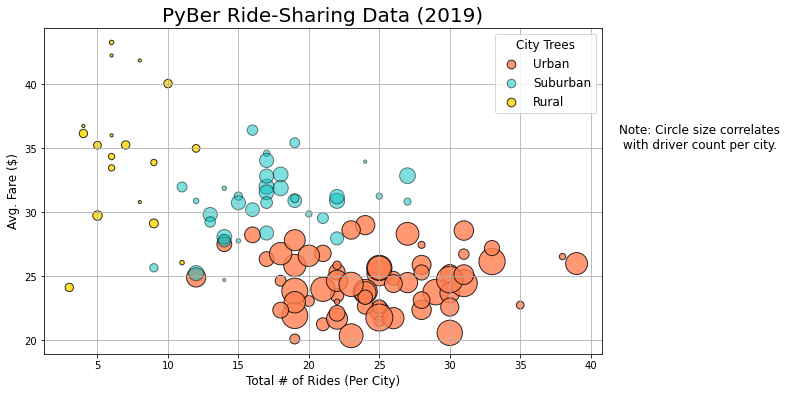

In [49]:
# Adding 3 charts into one 
plt.subplots(figsize=(10, 6)) # image size
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            c="coral", edgecolor="k", alpha=0.8,
            label="Urban",
            linewidths=1
           )
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c="c", edgecolor="k", alpha=0.5,
            label="Suburban",
            linewidths=1
           )
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count,
            c="gold", edgecolor="k", alpha=0.8,
            label="Rural",
            linewidths=1
           )

# adding Graph Properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total # of Rides (Per City)", fontsize=12)
plt.ylabel("Avg. Fare ($)", fontsize=12)
plt.grid(True)

# customize legend
lgnd = plt.legend(fontsize="12", mode="Expanded", 
                  scatterpoints=1, 
                  loc="best", 
                  title="City Trees"
                 )
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# text about circle size
plt.text(42, 35, "Note: Circle size correlates\n with driver count per city.", fontsize="12")

# save figure
plt.savefig("analysis/Fig1.png", bbox_inches="tight", dpi=150)

plt.show()

